In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Collecting data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
import spotipy
import pandas as pd
from tqdm import tqdm
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
from spotipy.oauth2 import SpotifyClientCredentials

cid = "b9ff596f8afd419ab00f96c0e3ff1aff"
secret = "fcc60a813705409090478d22581c726e"
client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

<IPython.core.display.Javascript object>

In [49]:
# artist_name = []
# track_name = []
# popularity = []
# track_id = []
# release_date = []
# for year in range(2000, 2024):
#     for i in range(0, 1000, 50):
#         track_results = sp.search(
#             q="genre:pop; year:" + str(year),
#             type="track",
#             limit=50,
#             offset=i,
#             market="US",
#         )
#         for index, t in enumerate(track_results["tracks"]["items"]):
#             artist_name.append(t["artists"][0]["name"])
#             track_name.append(t["name"])
#             track_id.append(t["id"])
#             popularity.append(t["popularity"])
#             release_date.append(t["album"]["release_date"])

<IPython.core.display.Javascript object>

In [50]:
# track_dataframe = pd.DataFrame(
#     {
#         "artist_name": artist_name,
#         "track_name": track_name,
#         "track_id": track_id,
#         "popularity": popularity,
#         "release_date": release_date,
#     }
# )
# print(track_dataframe.shape)
# track_dataframe.head()

<IPython.core.display.Javascript object>

In [51]:
# features_df = pd.DataFrame()
# for i in tqdm(track_id):
#     features_i = sp.audio_features(tracks=[i])
#     features_df_i = pd.DataFrame(features_i)
#     features_df = pd.concat([features_df, features_df_i])

# features_df.reset_index(inplace=True)
# concat_df = pd.concat([track_dataframe, features_df], axis=1)
# concat_df.to_csv("spotify_pop_music.csv", index=False)

<IPython.core.display.Javascript object>

# Read data from CSV

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [7]:
music_df = pd.read_csv(r"data/spotify_pop_music.csv")

<IPython.core.display.Javascript object>

In [8]:
music_df.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [9]:
music_df["release_date"] = pd.to_datetime(music_df["release_date"])

<IPython.core.display.Javascript object>

In [10]:
music_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'release_date',
       'index', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

<IPython.core.display.Javascript object>

In [11]:
music_features_df = music_df[
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
    ]
]

<IPython.core.display.Javascript object>

In [12]:
music_features_columns = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

<IPython.core.display.Javascript object>

In [13]:
# fill NA with 0
music_features_df.fillna(0, inplace=True)

/var/folders/zy/37rlw8g16_b33wp61rzxsvc80000gn/T/ipykernel_30617/3918738992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_features_df.fillna(0, inplace=True)


<IPython.core.display.Javascript object>

In [14]:
music_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23987 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      23987 non-null  float64
 1   energy            23987 non-null  float64
 2   speechiness       23987 non-null  float64
 3   acousticness      23987 non-null  float64
 4   instrumentalness  23987 non-null  float64
 5   liveness          23987 non-null  float64
 6   valence           23987 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


<IPython.core.display.Javascript object>

In [15]:
music_features_np = music_features_df.to_numpy()
music_features_np

array([[4.29e-01, 6.61e-01, 2.81e-02, ..., 1.21e-04, 2.34e-01, 2.85e-01],
       [5.45e-01, 8.65e-01, 2.86e-02, ..., 1.10e-05, 1.68e-01, 5.43e-01],
       [8.43e-01, 8.06e-01, 2.69e-01, ..., 0.00e+00, 7.71e-02, 6.13e-01],
       ...,
       [6.38e-01, 2.59e-01, 8.98e-02, ..., 0.00e+00, 2.19e-01, 2.69e-01],
       [4.43e-01, 2.98e-01, 6.44e-02, ..., 1.00e-05, 1.03e-01, 1.72e-01],
       [5.56e-01, 6.61e-01, 2.04e-01, ..., 0.00e+00, 1.01e-01, 6.68e-01]])

<IPython.core.display.Javascript object>

# Unsupervised clustering: PCA+Kmeans

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
music_features_np = scaler.fit_transform(music_features_np)

<IPython.core.display.Javascript object>

## elbow plot

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(music_features_np)
    wcss.append(model.inertia_)

#     kmeanModel = KMeans(n_clusters=i)
#     kmeanModel.fit(data)
#     distortions.append(kmeanModel.inertia_)

/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

<IPython.core.display.Javascript object>

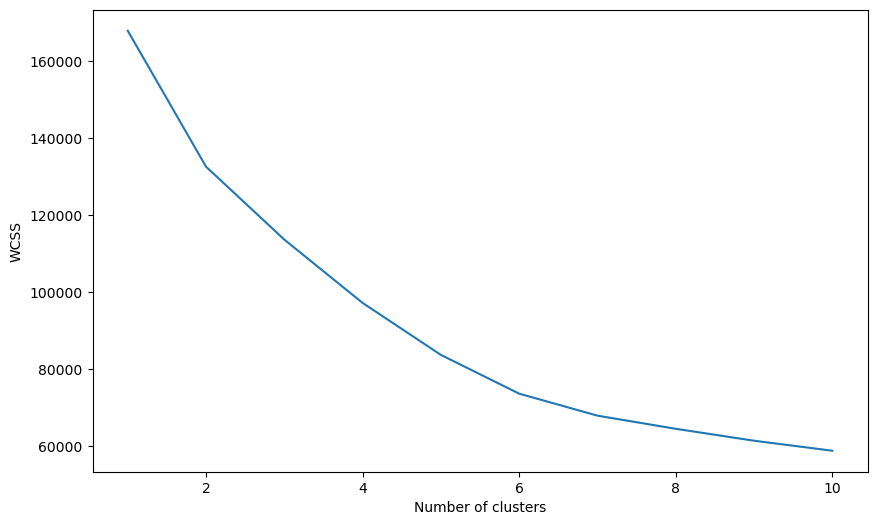

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

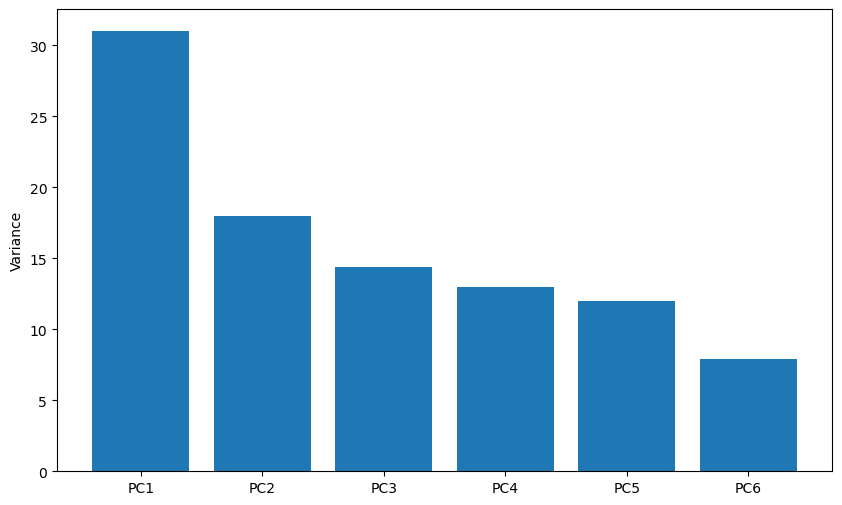

<IPython.core.display.Javascript object>

In [19]:
from sklearn.decomposition import PCA

pca = PCA(6)
pca_data = pca.fit_transform(music_features_np)

plt.figure(figsize=(10, 6))
var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
lbls = ["PC" + str(x) for x in range(1, len(var) + 1)]
plt.bar(x=range(1, len(var) + 1), height=var, tick_label=lbls)
plt.ylabel("Variance")
plt.show()

In [20]:
pca_components_np = pca.components_

<IPython.core.display.Javascript object>

In [21]:
pca_components_np

array([[-0.31531731, -0.54159552, -0.24118803,  0.5140574 ,  0.24210345,
        -0.13497698, -0.45605892],
       [-0.63067128,  0.35692543, -0.14105613, -0.3166843 ,  0.16527981,
         0.47270157, -0.32234765],
       [ 0.02424062, -0.22038819,  0.68662292,  0.21172717, -0.34472741,
         0.51870758, -0.21602653],
       [ 0.18682969,  0.00234502,  0.2904543 ,  0.09651391,  0.87552329,
         0.24054808,  0.21680896],
       [-0.20125731,  0.11828943,  0.57531446, -0.26298713,  0.14061651,
        -0.64163655, -0.33746657],
       [-0.60058089,  0.16164843,  0.18332495,  0.4332555 , -0.09384582,
        -0.13344455,  0.6043505 ]])

<IPython.core.display.Javascript object>

## Vis: 2D scatter plot + clusters

/Users/zhhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 1 ... 0 0 1]


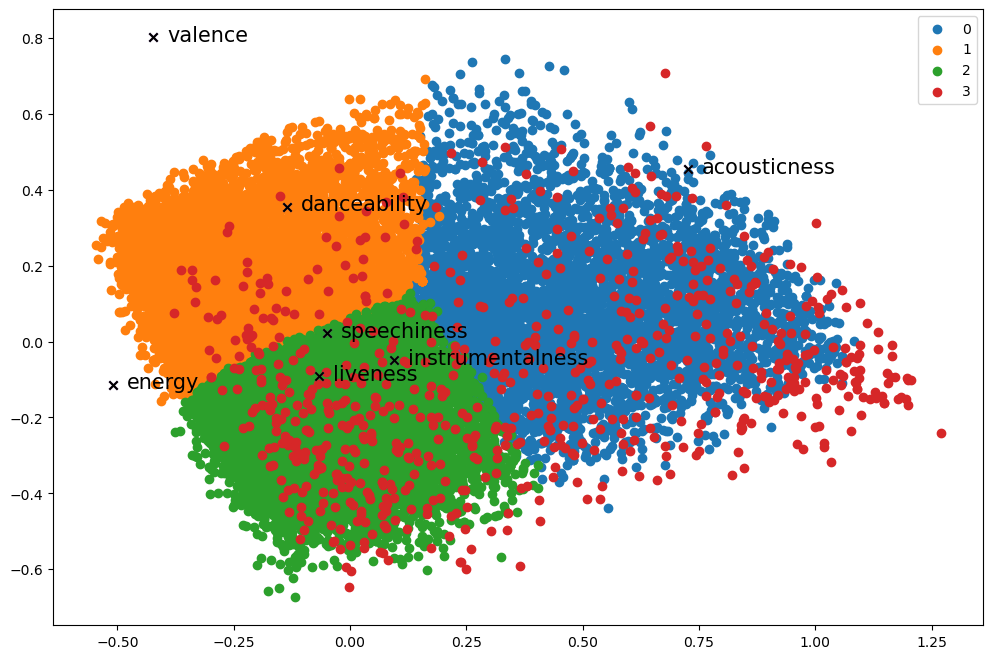

<IPython.core.display.Javascript object>

In [22]:
model = KMeans(n_clusters=4, random_state=42, init="k-means++")
label = model.fit_predict(music_features_df)
data = pca.fit_transform(music_features_df)
print(label)


plt.figure(figsize=(12, 8))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i, 0], data[label == i, 1], label=i)

pca_components_np = pca.components_
pca_component1_np = pca_components_np[0]
pca_component2_np = pca_components_np[1]
pca_component3_np = pca_components_np[2]
plt.scatter(pca_component1_np, pca_component2_np, marker="x")

music_features_list = music_features_df.columns
for i in range(len(music_features_list)):
    plt.scatter(pca_component1_np[i], pca_component2_np[i], marker="x", color="black")
    plt.text(
        pca_component1_np[i] + 0.03,
        pca_component2_np[i] - 0.01,
        music_features_list[i],
        fontsize=15,
    )
# fig, ax = plt.subplots()
# for i, txt in enumerate(music_features_df):
#     ax.annotate(txt, (pca_component1_np[i], pca_component2_np[i]))

plt.legend()
plt.show()

In [23]:
music_df["label"] = label
music_df[music_df["label"] == 0].sample(10)

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label
11893,Vanessa Carlton,A Thousand Miles - Acoustic,1YuUPfLPOyvB1QYDKam0tc,54,2011-11-21,0,0.440,0.236,11,-7.712,...,0.329,83.935,audio_features,1YuUPfLPOyvB1QYDKam0tc,spotify:track:1YuUPfLPOyvB1QYDKam0tc,https://api.spotify.com/v1/tracks/1YuUPfLPOyvB...,https://api.spotify.com/v1/audio-analysis/1YuU...,278347,4,0
18930,Ella Mai,Close,3KVlk3I9qKGTPFpkWA20nh,51,2018-10-12,0,0.736,0.447,5,-7.216,...,0.285,81.007,audio_features,3KVlk3I9qKGTPFpkWA20nh,spotify:track:3KVlk3I9qKGTPFpkWA20nh,https://api.spotify.com/v1/tracks/3KVlk3I9qKGT...,https://api.spotify.com/v1/audio-analysis/3KVl...,251990,4,0
7848,Lamp,ムード・ロマンティカNo2,2fsUmzxehyV8M0zXoxcBbE,40,2007-03-07,0,0.508,0.228,7,-11.555,...,0.184,109.424,audio_features,2fsUmzxehyV8M0zXoxcBbE,spotify:track:2fsUmzxehyV8M0zXoxcBbE,https://api.spotify.com/v1/tracks/2fsUmzxehyV8...,https://api.spotify.com/v1/audio-analysis/2fsU...,267493,3,0
17853,Cosmo Sheldrake,Come Along - Edit,7d5QkRsuNs92VualsvFcYM,48,2017-10-12,0,0.650,0.701,0,-5.531,...,0.308,97.965,audio_features,7d5QkRsuNs92VualsvFcYM,spotify:track:7d5QkRsuNs92VualsvFcYM,https://api.spotify.com/v1/tracks/7d5QkRsuNs92...,https://api.spotify.com/v1/audio-analysis/7d5Q...,219413,4,0
23389,Billie Eilish,you should see me in a crown,3aAe8vDul7kFZNYwrNtamz,0,2023-03-10,0,0.683,0.534,4,-10.348,...,0.284,150.469,audio_features,3aAe8vDul7kFZNYwrNtamz,spotify:track:3aAe8vDul7kFZNYwrNtamz,https://api.spotify.com/v1/tracks/3aAe8vDul7kF...,https://api.spotify.com/v1/audio-analysis/3aAe...,180567,4,0
20713,Kehlani,Hate The Club (feat. Masego),0QUbiLQySWPq5Lh3f7A9bN,57,2020-05-08,0,0.663,0.626,1,-4.756,...,0.494,105.026,audio_features,0QUbiLQySWPq5Lh3f7A9bN,spotify:track:0QUbiLQySWPq5Lh3f7A9bN,https://api.spotify.com/v1/tracks/0QUbiLQySWPq...,https://api.spotify.com/v1/audio-analysis/0QUb...,278715,4,0
20054,Glass Animals,Heat Waves,6CDzDgIUqeDY5g8ujExx2f,78,2020-06-29,0,0.761,0.525,11,-6.900,...,0.531,80.870,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,238805,4,0
21542,Alina Baraz,Alone With You,0jHVNBt8A9L8qEAB8XxGuB,60,2021-07-22,0,0.567,0.348,10,-12.658,...,0.305,124.692,audio_features,0jHVNBt8A9L8qEAB8XxGuB,spotify:track:0jHVNBt8A9L8qEAB8XxGuB,https://api.spotify.com/v1/tracks/0jHVNBt8A9L8...,https://api.spotify.com/v1/audio-analysis/0jHV...,226278,3,0
16394,Kelly Clarkson,Piece by Piece - Idol Version,3KbFtYPyVP6C7BQVgH2cCf,57,2016-03-04,0,0.561,0.245,1,-6.372,...,0.402,109.558,audio_features,3KbFtYPyVP6C7BQVgH2cCf,spotify:track:3KbFtYPyVP6C7BQVgH2cCf,https://api.spotify.com/v1/tracks/3KbFtYPyVP6C...,https://api.spotify.com/v1/audio-analysis/3KbF...,212280,4,0
15702,Pinegrove,Angelina,7Dt26KoNRmZpzlVwMe6LSP,50,2015-10-15,0,0.447,0.541,1,-6.527,...,0.436,101.070,audio_features,7Dt26KoNRmZpzlVwMe6LSP,spotify:track:7Dt26KoNRmZpzlVwMe6LSP,https://api.spotify.com/v1/tracks/7Dt26KoNRmZp...,https://api.spotify.com/v1/audio-analysis/7Dt2...,101053,4,0


<IPython.core.display.Javascript object>

In [24]:
# 0-focus 1-relax 2-workout 3-commute

<IPython.core.display.Javascript object>

## Vis: Interactive 3D scatter plot + clusters

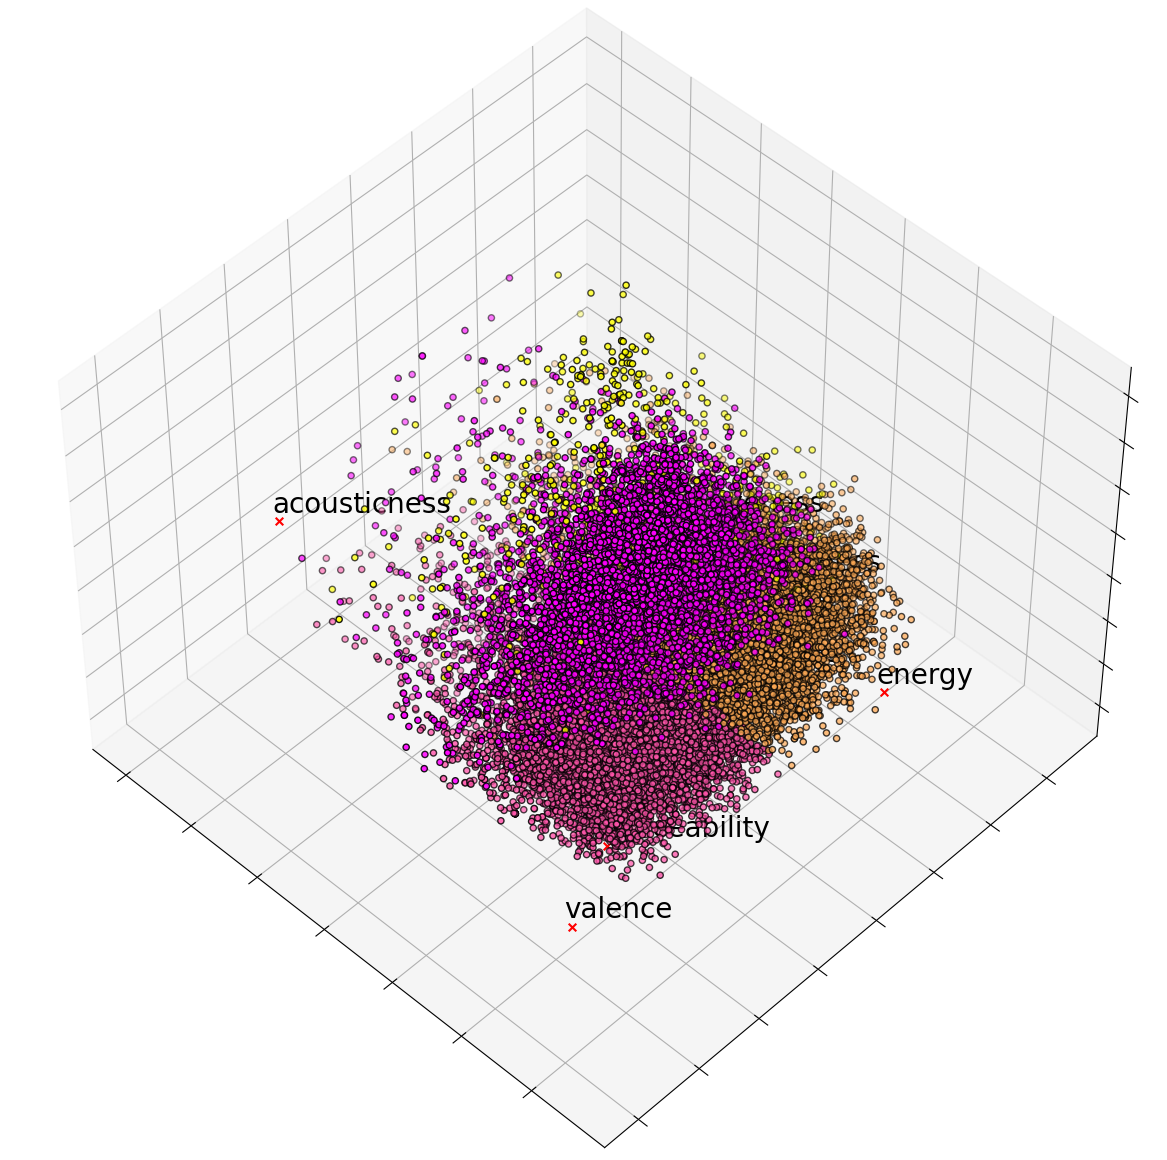

<IPython.core.display.Javascript object>

In [25]:
# %matplotlib widget
X = pca_data
y = label

fig = plt.figure(figsize=(12, 15))
# ax = Axes3D(fig, auto_add_to_figure=False)
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

ax.scatter(
    data[:, 2],
    data[:, 1],
    data[:, 0],
    c=y,
    cmap="spring",
    edgecolor="k",
)

for i in range(len(music_features_list)):
    ax.scatter(
        pca_component1_np[i],
        pca_component2_np[i],
        pca_component3_np[i],
        marker="x",
        color="red",
        s=30,
        #         zorder=1,
    )
    ax.text(
        pca_component1_np[i] + 0.03,
        pca_component2_np[i] - 0.01,
        pca_component3_np[i] - 0.01,
        music_features_list[i],
        #         s="h1",
        fontsize=20,
        color="black",
        #         zorder=1,
    )


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# plt.legend()
plt.show()

# EDA: Music features change with time

In [26]:
music_df["artist_name"].value_counts().index[:10]

Index(['Taylor Swift', 'The Weeknd', 'Drake', 'Lady Gaga', 'Lana Del Rey',
       'BTS', 'Rihanna', 'Justin Bieber', 'Beyoncé', 'Lil Wayne'],
      dtype='object')

<IPython.core.display.Javascript object>

In [27]:
top_10_artists = music_df["artist_name"].value_counts().index[:10]
top_10_artists

Index(['Taylor Swift', 'The Weeknd', 'Drake', 'Lady Gaga', 'Lana Del Rey',
       'BTS', 'Rihanna', 'Justin Bieber', 'Beyoncé', 'Lil Wayne'],
      dtype='object')

<IPython.core.display.Javascript object>

In [28]:
music_df["year"] = music_df["release_date"].dt.year

<IPython.core.display.Javascript object>

In [29]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23987 entries, 0 to 23999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artist_name       23987 non-null  object        
 1   track_name        23987 non-null  object        
 2   track_id          23987 non-null  object        
 3   popularity        23987 non-null  int64         
 4   release_date      23987 non-null  datetime64[ns]
 5   index             23987 non-null  int64         
 6   danceability      23987 non-null  float64       
 7   energy            23987 non-null  float64       
 8   key               23987 non-null  int64         
 9   loudness          23987 non-null  float64       
 10  mode              23987 non-null  int64         
 11  speechiness       23987 non-null  float64       
 12  acousticness      23987 non-null  float64       
 13  instrumentalness  23987 non-null  float64       
 14  liveness          2398

<IPython.core.display.Javascript object>

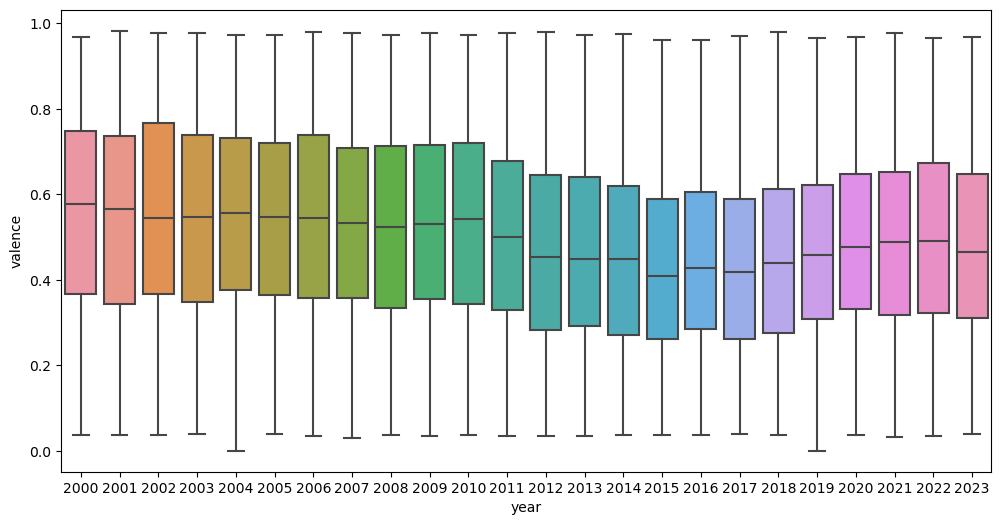

<IPython.core.display.Javascript object>

In [30]:
fig = plt.figure(1, figsize=(12, 6))
sns.boxplot(data=music_df, x="year", y="valence", dodge=False)
plt.show()

<Axes: xlabel='year', ylabel='energy'>

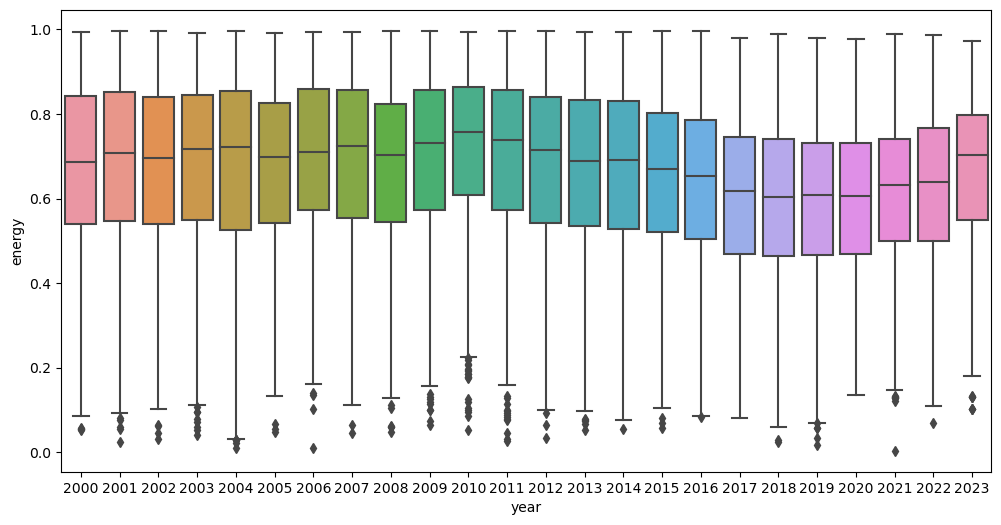

<IPython.core.display.Javascript object>

In [31]:
fig = plt.figure(1, figsize=(12, 6))
sns.boxplot(data=music_df, x="year", y="energy", dodge=False)

<Figure size 1200x600 with 0 Axes>

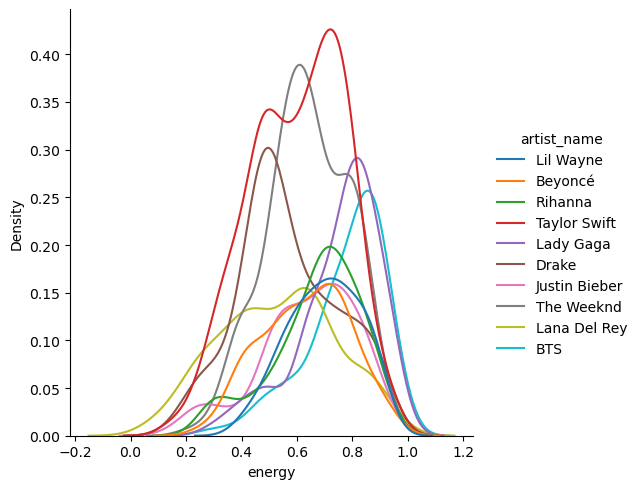

<IPython.core.display.Javascript object>

In [32]:
fig = plt.figure(1, figsize=(12, 6))
sns.displot(
    data=music_df[music_df["artist_name"].isin(top_10_artists)],
    x="energy",
    kind="kde",
    hue="artist_name",
)

# sns.displot(
#     data=music_df[(music_df["artist_name"] == "The Weeknd")], x="energy", kind="kde",
# )

## Correlation analysis

In [33]:
popularity_df = music_df[
    [
        "popularity",
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
    ]
]

<IPython.core.display.Javascript object>

In [34]:
corr = popularity_df.corr()

<IPython.core.display.Javascript object>

<Axes: >

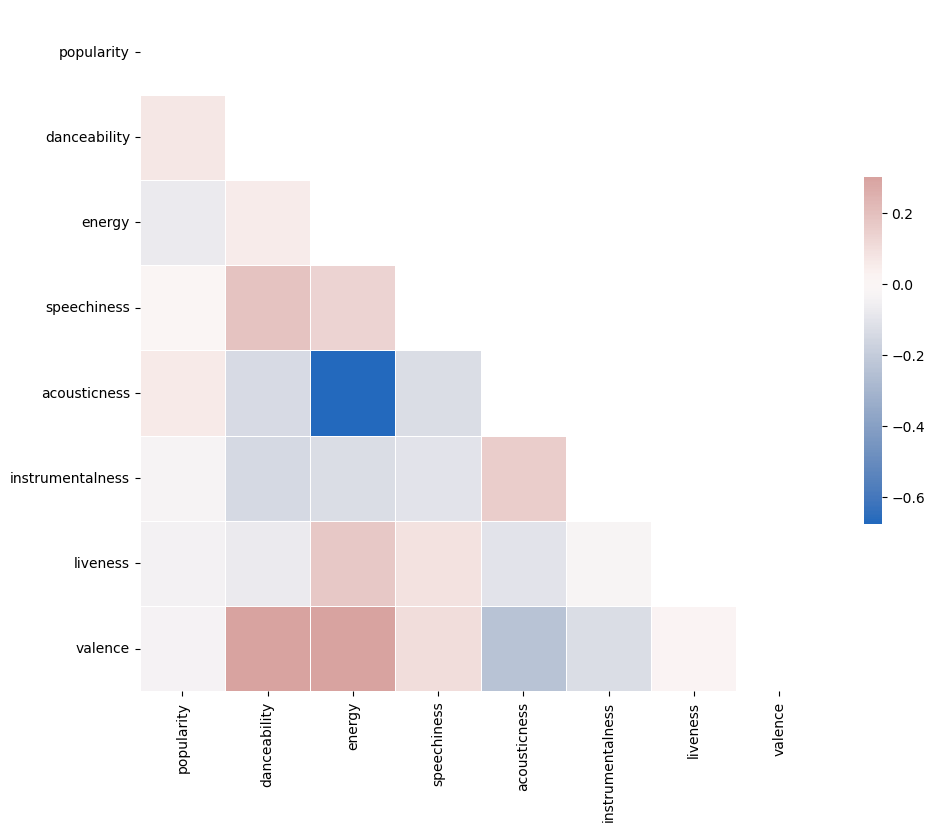

<IPython.core.display.Javascript object>

In [35]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap="vlag",
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# Recommender System

In [36]:
music_df[music_df["popularity"] > 50].sample(20)

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label,year
6520,Eason Chan,最佳損友,6AcdKwlWDTVEoc3gctxsji,51,2006-01-01,0,0.605,0.542,4,-7.961,...,144.154,audio_features,6AcdKwlWDTVEoc3gctxsji,spotify:track:6AcdKwlWDTVEoc3gctxsji,https://api.spotify.com/v1/tracks/6AcdKwlWDTVE...,https://api.spotify.com/v1/audio-analysis/6Acd...,233560,4,0,2006
13088,Avril Lavigne,Here's to Never Growing Up,0qwcGscxUHGZTgq0zcaqk1,65,2013-11-01,0,0.482,0.873,0,-3.145,...,165.084,audio_features,0qwcGscxUHGZTgq0zcaqk1,spotify:track:0qwcGscxUHGZTgq0zcaqk1,https://api.spotify.com/v1/tracks/0qwcGscxUHGZ...,https://api.spotify.com/v1/audio-analysis/0qwc...,214320,4,1,2013
18407,beabadoobee,Dance with Me,2sBKLT7bFa38yVAYxYltUX,62,2018-12-07,0,0.360,0.209,4,-10.293,...,199.950,audio_features,2sBKLT7bFa38yVAYxYltUX,spotify:track:2sBKLT7bFa38yVAYxYltUX,https://api.spotify.com/v1/tracks/2sBKLT7bFa38...,https://api.spotify.com/v1/audio-analysis/2sBK...,234283,4,0,2018
23595,Don Toliver,Cinderella (feat. Toro y Moi),7kIMrbJ0U0TKnPQpdyPvUn,63,2023-02-24,0,0.498,0.511,5,-5.179,...,135.029,audio_features,7kIMrbJ0U0TKnPQpdyPvUn,spotify:track:7kIMrbJ0U0TKnPQpdyPvUn,https://api.spotify.com/v1/tracks/7kIMrbJ0U0TK...,https://api.spotify.com/v1/audio-analysis/7kIM...,226707,1,2,2023
5248,Chris Brown,Ain't No Way (You Won't Love Me),74rIUpem6Mzx2iNi8Fr1vM,52,2005-01-01,0,0.702,0.585,6,-7.617,...,93.003,audio_features,74rIUpem6Mzx2iNi8Fr1vM,spotify:track:74rIUpem6Mzx2iNi8Fr1vM,https://api.spotify.com/v1/tracks/74rIUpem6Mzx...,https://api.spotify.com/v1/audio-analysis/74rI...,203800,4,1,2005
18207,KYLE,iSpy (feat. Lil Yachty),6xbraxG0bSBOuAr5IUXmtM,62,2018-05-18,0,0.723,0.654,0,-6.820,...,149.949,audio_features,6xbraxG0bSBOuAr5IUXmtM,spotify:track:6xbraxG0bSBOuAr5IUXmtM,https://api.spotify.com/v1/tracks/6xbraxG0bSBO...,https://api.spotify.com/v1/audio-analysis/6xbr...,252240,4,1,2018
4150,Arcade Fire,Rebellion (Lies),0xOeB16JDbBJBJKSdHbElT,60,2004-06-16,0,0.401,0.933,8,-5.682,...,127.193,audio_features,0xOeB16JDbBJBJKSdHbElT,spotify:track:0xOeB16JDbBJBJKSdHbElT,https://api.spotify.com/v1/tracks/0xOeB16JDbBJ...,https://api.spotify.com/v1/audio-analysis/0xOe...,310893,4,1,2004
5001,Rihanna,Pon de Replay,4TsmezEQVSZNNPv5RJ65Ov,78,2005-08-29,0,0.779,0.640,7,-8.415,...,99.019,audio_features,4TsmezEQVSZNNPv5RJ65Ov,spotify:track:4TsmezEQVSZNNPv5RJ65Ov,https://api.spotify.com/v1/tracks/4TsmezEQVSZN...,https://api.spotify.com/v1/audio-analysis/4Tsm...,246960,4,2,2005
15217,Andy Grammer,Good To Be Alive (Hallelujah),3gHc5XTAywdFQUsHS6DD7G,56,2015-11-20,0,0.797,0.896,5,-3.678,...,120.037,audio_features,3gHc5XTAywdFQUsHS6DD7G,spotify:track:3gHc5XTAywdFQUsHS6DD7G,https://api.spotify.com/v1/tracks/3gHc5XTAywdF...,https://api.spotify.com/v1/audio-analysis/3gHc...,189098,4,1,2015
15251,Melanie Martinez,Milk and Cookies,5G9qKplB5e4lIpSncwKWVE,61,2015-08-14,0,0.568,0.613,0,-5.069,...,89.951,audio_features,5G9qKplB5e4lIpSncwKWVE,spotify:track:5G9qKplB5e4lIpSncwKWVE,https://api.spotify.com/v1/tracks/5G9qKplB5e4l...,https://api.spotify.com/v1/audio-analysis/5G9q...,206280,4,2,2015


<IPython.core.display.Javascript object>

In [37]:
# 0-focus 1-relax 2-workout 3-commute

<IPython.core.display.Javascript object>

In [38]:
shuffled_music_df = pd.read_csv("data/shuffled_spotify_pop_music.csv")

<IPython.core.display.Javascript object>

In [39]:
# labelling track with user context category
def context_conditions(mood_df):
    if (
        (mood_df["acousticness"] > 0.1)
        and (mood_df["speechiness"] < 0.05)
        and (mood_df["liveness"] < 0.15)
    ):
        return 0
    elif (mood_df["valence"] > 0.5) and (mood_df["speechiness"] < 0.087):
        return 1
    elif (mood_df["energy"] > 0.6) and (mood_df["danceability"] > 0.6):
        return 2
    else:
        return 3

<IPython.core.display.Javascript object>

In [40]:
shuffled_music_df["context"] = shuffled_music_df.apply(context_conditions, axis=1)
shuffled_music_df["context"].value_counts()
shuffled_music_df.to_csv("data/shuffled_spotify_pop_music.csv", index=False)

<IPython.core.display.Javascript object>

## Cosine Similarity

In [41]:
user_selected_df = music_df[music_df["popularity"] > 50].sample(3)

<IPython.core.display.Javascript object>

In [42]:
user_selected_features_np = []
for i in user_selected_df.index:
    user_selected_features_np.append(music_features_np[i])
user_selected_features_mean_np = np.mean(np.stack(user_selected_features_np), axis=0)
user_selected_features_mean_np

array([-0.06307114, -0.84964886, -0.5828008 ,  0.50564875, -0.23442878,
       -0.16134171, -0.44124008])

<IPython.core.display.Javascript object>

In [45]:
user_context = input(
    "What context are you listening to music? 0-focus 1-relax 2-workout 3-commute"
)

What context are you listening to music? 0-focus 1-relax 2-workout 3-commute0


<IPython.core.display.Javascript object>

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_simi_dict = {}
for i in range(len(label)):
    if str(label[i]) == user_context:
        cosine_simi_dict[i] = cosine_similarity(
            user_selected_features_mean_np.reshape(1, -1),
            music_features_np[i].reshape(1, -1),
        )[0][0]

<IPython.core.display.Javascript object>

In [47]:
top_10_similar_list = sorted(
    cosine_simi_dict.items(), key=lambda x: x[1], reverse=True
)[:10]

<IPython.core.display.Javascript object>

In [48]:
recommend_index_list = []
for i in top_10_similar_list:
    recommend_index_list.append(i[0])
# the recommended playlist of 10 songs
music_df[music_df.index.isin(recommend_index_list)]

,artist_name,track_name,track_id,popularity,release_date,index,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label,year
2947,Love Affair,Everlasting Love,2YXk3fQNetKD5WyzP0sk1w,43,2002-02-21,0,0.489,0.589,4,-10.644,...,120.479,audio_features,2YXk3fQNetKD5WyzP0sk1w,spotify:track:2YXk3fQNetKD5WyzP0sk1w,https://api.spotify.com/v1/tracks/2YXk3fQNetKD...,https://api.spotify.com/v1/audio-analysis/2YXk...,181933,4,1,2002
4252,La Oreja de Van Gogh,Puedes Contar Conmigo,3xQbgIqO1tmJMAz91CRiCK,48,2004-05-10,0,0.647,0.898,6,-4.851,...,144.985,audio_features,3xQbgIqO1tmJMAz91CRiCK,spotify:track:3xQbgIqO1tmJMAz91CRiCK,https://api.spotify.com/v1/tracks/3xQbgIqO1tmJ...,https://api.spotify.com/v1/audio-analysis/3xQb...,238533,4,1,2004
5841,Slim Thug,Like A Boss,5Z4LYEHH8PmYKU2NEK672L,39,2005-01-01,0,0.860,0.500,1,-5.108,...,86.012,audio_features,5Z4LYEHH8PmYKU2NEK672L,spotify:track:5Z4LYEHH8PmYKU2NEK672L,https://api.spotify.com/v1/tracks/5Z4LYEHH8PmY...,https://api.spotify.com/v1/audio-analysis/5Z4L...,198147,4,0,2005
6240,The Orion Experience,The Queen of White Lies,7FHrTE3de8AuB9Vuv7cRhZ,51,2006-01-01,0,0.760,0.854,0,-4.150,...,122.918,audio_features,7FHrTE3de8AuB9Vuv7cRhZ,spotify:track:7FHrTE3de8AuB9Vuv7cRhZ,https://api.spotify.com/v1/tracks/7FHrTE3de8Au...,https://api.spotify.com/v1/audio-analysis/7FHr...,188314,4,1,2006
9309,Creed,On My Sleeve,5rqV8nkm4TM1AtuByswVKa,54,2009-01-01,0,0.452,0.911,4,-3.859,...,144.028,audio_features,5rqV8nkm4TM1AtuByswVKa,spotify:track:5rqV8nkm4TM1AtuByswVKa,https://api.spotify.com/v1/tracks/5rqV8nkm4TM1...,https://api.spotify.com/v1/audio-analysis/5rqV...,254387,4,2,2009
9754,Hannah Montana,Don't Wanna Be Torn,4vAc0cSE6cW1bWMmLAgfjf,42,2009-01-01,0,0.468,0.838,3,-2.942,...,87.961,audio_features,4vAc0cSE6cW1bWMmLAgfjf,spotify:track:4vAc0cSE6cW1bWMmLAgfjf,https://api.spotify.com/v1/tracks/4vAc0cSE6cW1...,https://api.spotify.com/v1/audio-analysis/4vAc...,208600,4,2,2009
14642,Joyce Manor,Falling in Love Again,2M0IWOmIi079R1MaPVlOW3,49,2014-07-22,0,0.335,0.936,2,-2.056,...,177.422,audio_features,2M0IWOmIi079R1MaPVlOW3,spotify:track:2M0IWOmIi079R1MaPVlOW3,https://api.spotify.com/v1/tracks/2M0IWOmIi079...,https://api.spotify.com/v1/audio-analysis/2M0I...,148120,4,2,2014
14870,AURORA,Warrior,597qlcmqAPi6cNRNIg4cQv,48,2014-01-01,0,0.362,0.544,7,-6.664,...,97.448,audio_features,597qlcmqAPi6cNRNIg4cQv,spotify:track:597qlcmqAPi6cNRNIg4cQv,https://api.spotify.com/v1/tracks/597qlcmqAPi6...,https://api.spotify.com/v1/audio-analysis/597q...,223040,3,2,2014
15344,Kid Ink,Promise (feat. Fetty Wap),5IZc3KIVFhjzJ0L2kiXzUl,59,2015-12-25,0,0.797,0.469,8,-8.112,...,103.057,audio_features,5IZc3KIVFhjzJ0L2kiXzUl,spotify:track:5IZc3KIVFhjzJ0L2kiXzUl,https://api.spotify.com/v1/tracks/5IZc3KIVFhjz...,https://api.spotify.com/v1/audio-analysis/5IZc...,224240,4,2,2015
21180,Lovejoy,One Day,58U47mHjyLwUwJZ7voUt15,67,2021-05-08,0,0.339,0.730,10,-8.568,...,183.144,audio_features,58U47mHjyLwUwJZ7voUt15,spotify:track:58U47mHjyLwUwJZ7voUt15,https://api.spotify.com/v1/tracks/58U47mHjyLwU...,https://api.spotify.com/v1/audio-analysis/58U4...,144375,4,1,2021


<IPython.core.display.Javascript object>